# Selenium for candidates scrapping

In [1]:
import selenium
# Selinium --- IGNORE ---
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
import pandas as pd

In [2]:
# let's try to scrape some data from a website using Selenium

# Set up Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-infobars")
def start_driver():
    driver = webdriver.Chrome(options=chrome_options)
    return driver

# Path to your ChromeDriver
chrome_driver_path = r'C:\YoussefENSI_backup\Eukliadia-test\chromedriver.exe'  # Update this path
service = Service(chrome_driver_path)
# opening chrome window
driver = webdriver.Chrome(service=service, options=chrome_options,)


In [13]:

driver.get('https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin')  # Replace with the target URL
try:
    # Wait until the element is present
    element = WebDriverWait(driver, 10)
    print("Page is ready!")
except TimeoutException:
    print("Loading took too much time!")
finally:
    # Stop process
    driver.quit()

Page is ready!


In [9]:
import os
from dotenv import load_dotenv
load_dotenv()
LK_USERNAME = os.getenv('LK_USERNAME')
LK_PASSWORD = os.getenv('LK_PASSWORD')
print(LK_USERNAME)

ghaouiyoussef12@gmail.com


In [10]:
# lets try to login to linkedin
# Two steps verification should be disabled for this to work    
# driver = webdriver.Chrome(service=service, options=chrome_options,)
driver.get('https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin')  # Replace with the target URL
    # Wait until the element is present
element = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "username"))
)
print("Page is ready!") 
username = driver.find_element(By.ID, "username")
password = driver.find_element(By.ID, "password")
username.send_keys(LK_USERNAME)
password.send_keys(LK_PASSWORD)
login_button = driver.find_element(By.XPATH, '//*[@type="submit"]')
login_button.click()
time.sleep(5)  # wait for 5 seconds to ensure the page loads
print("Login successful!")
# except TimeoutException:
#     print("Loading took too much time!")    
# finally:
#     # Stop process
#     driver.quit()

Page is ready!
Login successful!


# search for the job role on linkedin and get the links of the candidates profiles

In [ ]:
# driver.get('https://www.linkedin.com/feed/')

In [16]:
# searcg for SOftware engineering with 3 years experience
search_input = driver.find_element(By.CLASS_NAME, 'search-global-typeahead__input')
search_input.send_keys('Software Engineer pyhton 3 years experience tunisia')

In [17]:
# press key enter
search_input.send_keys(u'\ue007')  # u'\ue007' is the Unicode for the Enter key

# Get to  the people section of the search results

In [18]:
li_list = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "li.search-reusables__primary-filter"))
)

target_btn = None
for li in li_list:
    try:
        # find the button inside this li (uses the shorter specific class)
        btn = li.find_element(By.CSS_SELECTOR, "button.search-reusables__filter-pill-button")
        # filter by visible text if you want a specific pill
        if "People" not in li.text: continue
        target_btn = btn
        break
    except Exception:
        continue

if target_btn is None:
    raise Exception("scrapper didnt find people section, check the div classname")


In [19]:
target_btn.click()

# !Alert! Get Candidates links
- **the div section containing the candidates changes daily.**

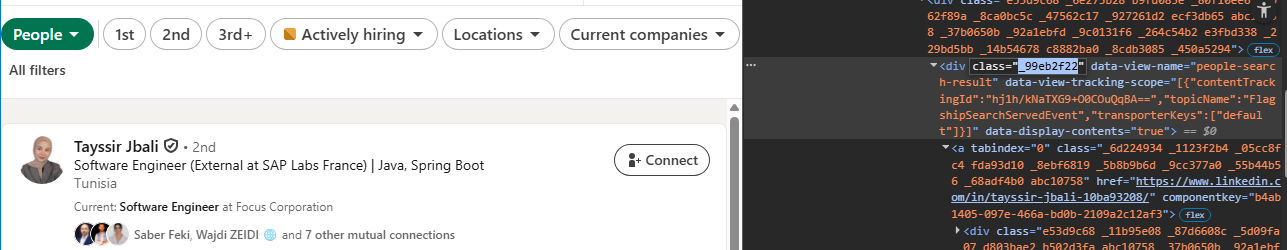
- _99eb2f22

In [20]:
DIV_section_class = "a59b534c "

# check if the class name is correct
WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"div.{DIV_section_class}"))
        )

[<selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2291")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2107")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.1712")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.1197")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.1678")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117

In [21]:
cards = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"div.{DIV_section_class}"))
)

candidates_links = []
for card in cards:
    href = None
    try:
        # preferred: find the nearest enclosing <a> (works when <a> wraps the card)
        href = card.find_element(By.XPATH, "./ancestor::a[1]").get_attribute("href")
    except Exception:
        try:
            # fallback: any descendant <a>
            href = card.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
        except Exception:
            href = None

    if href:
        candidates_links.append(href)

# deduplicate and filter None
candidates_links = list(dict.fromkeys([u for u in candidates_links if u]))
print("links found:", len(candidates_links))

links found: 12


In [22]:
candidates_links

['https://www.linkedin.com/jobs/',
 'https://www.linkedin.com/premium/products/?upsellOrderOrigin=Tracking%3Av1%3Apremium_people_search_usage_upsell_warn%3AAasaan%3AIn-Product&utype=aasaan&referenceId=r3P6N4LISquuP%2BPq9vZdGQ%3D%3D&isSS=false',
 'https://www.linkedin.com/in/khouloud-nasri/',
 'https://www.linkedin.com/in/mariem-ouertani-2a1b592a4/',
 'https://www.linkedin.com/in/nada-makki-58164317b/',
 'https://www.linkedin.com/in/rejeb-chaalia-045a86b6/',
 'https://www.linkedin.com/in/emansarahafi/',
 'https://www.linkedin.com/in/safoine-benhmida/en/',
 'https://www.linkedin.com/in/chiraz-mansar/',
 'https://www.linkedin.com/in/heniwael/',
 'https://www.linkedin.com/in/mohamad-idris-farhani/en/',
 'https://www.linkedin.com/in/mohamedelghoul8/']

# !Alert! Pagination
- **the li section containing the candidates changes daily.**
- **also ²  the button classes for pagination change daily.**

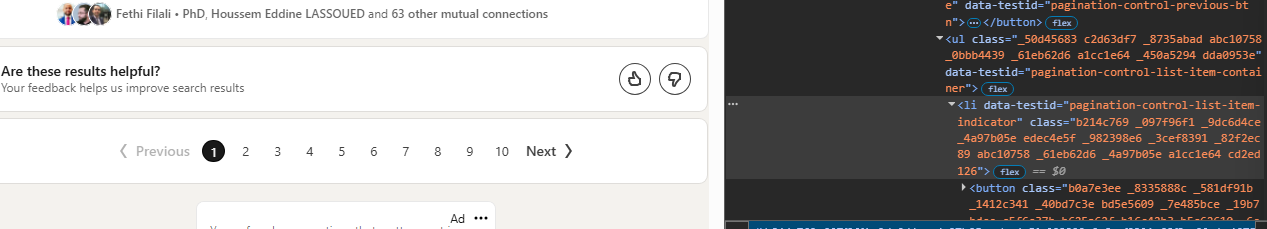
- b214c769

In [23]:
LI_section_class = "_45d059dd    "
pagination_btn_class = "_84bfc510   "
# check if the class name is correct
WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"li.{LI_section_class}"))
        )

[<selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2336")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2337")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2338")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2339")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.2340")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117

- Test page N click

In [24]:
#N
TEST_PAGE_N = 5

In [25]:
li_list = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"li.{LI_section_class}"))
        )
target_btn = None

for li in li_list:
    try:
        # find the button inside this li (uses the shorter specific class)
        btn = li.find_element(By.CSS_SELECTOR, f"button.{pagination_btn_class}")
        # filter by visible text if you want a specific pill
        if str(TEST_PAGE_N) not in li.text: continue
        target_btn = btn
        break
    except Exception:
        continue

if target_btn is None:
    raise Exception("Filter button not found in any li.search-reusables__primary-filter")

In [26]:
target_btn.click()

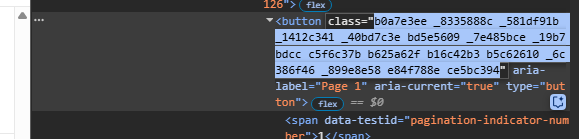

- pagination fucntion

In [27]:
def pagination_button_store(num_pages=10, LI_section_class=LI_section_class, pagination_btn_class=pagination_btn_class) -> dict:
    pages_buttons = {}
    # check if the class name is correct
    WebDriverWait(driver, 10).until(
                EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"li.{LI_section_class}"))
            )

    li_list = WebDriverWait(driver, 10).until(
                EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"li.{LI_section_class}"))
            )
    target_btn = None

    for li in li_list:
        # find the button inside this li (uses the shorter specific class)
        btn = li.find_element(By.CSS_SELECTOR, f"button.{pagination_btn_class}")
        
        # We check in the li.text is a number and if its in the [2, num_pages+1] then we add it to the dict , and remove from the list [2, num_pages+1]
        if not li.text.isdigit() or int(li.text) not in range(2, num_pages + 1): continue
        target_btn = btn
        pages_buttons[int(li.text)] = target_btn

    if target_btn is None:
        raise Exception("Filter button not found in any li.search-reusables__primary-filter")
    return pages_buttons
pages_buttons = pagination_button_store(num_pages=5)
pages_buttons

{2: <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.6005")>,
 3: <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.6007")>,
 4: <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.6009")>,
 5: <selenium.webdriver.remote.webelement.WebElement (session="e10f50e4dd58117b6c838f84b57f4e62", element="f.5F7C4A84E42D931C80C26EA6E207C4B2.d.46EAE251AEA2229A2A4AF5E26BEEAD46.e.6011")>}

In [17]:
# get_candidates_links function with number of candidates as input and btw pages usually have between 9 and 11 candidates

# we create a cleaning function to mkae sure link is of a profile candid.startswith('https://www.linkedin.com/in/') 
def list_links_check(links_list):
    return [link for link in links_list if link.startswith('https://www.linkedin.com/in/')]

def get_candidates_links(num_candidates=100) -> list:
    # Calculate the number of pages needed
    NUM_PAGES = (num_candidates // 10) +1
    
    FULL_CANDIDATES_LIST = []
    
    # we start in page 1 then at the end of the loop we click on the next page button
    for page in range(1, NUM_PAGES + 1):

        # --- Pagination buttons
        pages_buttons = pagination_button_store(num_pages=NUM_PAGES) # should be run after each pagination change


        cards = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, f"div.{DIV_section_class}"))
        )

        candidates_links = []
        for card in cards:
            href = None
            try:
                href = card.find_element(By.XPATH, "./ancestor::a[1]").get_attribute("href")
            except Exception:
                try:
                    href = card.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
                except Exception:
                    href = None

            if href:
                candidates_links.append(href)

        candidates_links = list_links_check(list(dict.fromkeys([u for u in candidates_links if u])))
        print("links found:", len(candidates_links), candidates_links)

        FULL_CANDIDATES_LIST.extend(candidates_links)

        if page < NUM_PAGES:  # No need to click next on the last page
            next_page_btn = pages_buttons.get(page + 1)
            if next_page_btn:
                next_page_btn.click()
                time.sleep(5)  # wait for the page to load
            else:
                print(f"No button found for page {page + 1}, stopping.")

                # check if we got enough candidates
                if len(FULL_CANDIDATES_LIST) >= num_candidates:
                    break
                else:
                    print(f"Only {len(FULL_CANDIDATES_LIST)} candidates found, less than requested {num_candidates}.")
        if len(FULL_CANDIDATES_LIST) < num_candidates:
            print(f"Only {len(FULL_CANDIDATES_LIST)} candidates found, less than requested {num_candidates}.")

    return FULL_CANDIDATES_LIST

In [18]:
get_candidates_links(num_candidates=31)

NameError: name 'pagination_button_store' is not defined

In [23]:
from copy import deepcopy as dc
FULL_CANDIDATES_LIST_backup = dc(FULL_CANDIDATES_LIST)


#### !Alert!
- **the div section containing the candidates changes daily.**

In [24]:
[candid.startswith('https://www.linkedin.com/in/') for candid in FULL_CANDIDATES_LIST]

[False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [25]:
#lets only keep correct links 
FULL_CANDIDATES_LIST = [candid for candid in FULL_CANDIDATES_LIST if candid.startswith('https://www.linkedin.com/in/')]
FULL_CANDIDATES_LIST

['https://www.linkedin.com/in/reziguialaa/',
 'https://www.linkedin.com/in/maissa-jemai1/',
 'https://www.linkedin.com/in/alaa-gharbi/',
 'https://www.linkedin.com/in/ines-ayari-797a961b7/',
 'https://www.linkedin.com/in/gara-mohamed-62516419a/',
 'https://www.linkedin.com/in/mohamed-aziz-belaidi-38b3a7231/',
 'https://www.linkedin.com/in/chaima-ben-ammar-039a30216/',
 'https://www.linkedin.com/in/melik-belkhiria/',
 'https://www.linkedin.com/in/asma-ben-jemia-1427a7199/',
 'https://www.linkedin.com/in/khmili-hamza-094760263/',
 'https://www.linkedin.com/in/yasmine-ben-cheikh/',
 'https://www.linkedin.com/in/mohamed-fedi-belaid-/en/',
 'https://www.linkedin.com/in/benbrahim98-habib/',
 'https://www.linkedin.com/in/marwaajmi/',
 'https://www.linkedin.com/in/haythem-djebbi-785ab9219/',
 'https://www.linkedin.com/in/rebhi-mariem-1940a0202/',
 'https://www.linkedin.com/in/siwar-zrelli-007554248/',
 'https://www.linkedin.com/in/yahya-hamdi-61ab1a234/',
 'https://www.linkedin.com/in/najeh-je

In [27]:
# Store in a CSV file
df = pd.DataFrame(FULL_CANDIDATES_LIST, columns=['LinkedIn Profile'])
df.to_csv('candidates_links.csv', index=False)


# Data extraction from candidates profile page
---
# Get sections data from profile page

In [11]:
# driver.get('https://www.linkedin.com/in/nourchen-noamen')
driver.get('https://www.linkedin.com/in/youssef-ghaoui') 

In [29]:
# wait for the UL container (use the long classname you posted)
ul = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "experience"))
)


In [31]:
# driver.get(FULL_CANDIDATES_LIST[0])  # Replace with the target URL
try:
    # Wait until the element is present
    element = WebDriverWait(driver, 10)
    print("Page is ready!")
except TimeoutException:
    print("Loading took too much time!")

Page is ready!


In [12]:
# importing bs4
import bs4 
    

page_source = driver.page_source
soup = bs4.BeautifulSoup(page_source, 'lxml')

# artdeco-card pv-profile-card break-words mt2
sections = soup.find_all('section', {'class': '''artdeco-card pv-profile-card break-words mt2'''})
sections

[<section class="artdeco-card pv-profile-card break-words mt2" data-view-name="profile-card" tabindex="-1">
 <!-- -->
 <div class="pv-profile-card__anchor" id="guidance">
 </div>
 <!-- -->
 <!-- -->
 <div class="KSrcSxfVMXDaPisMdhbydoqYfcEyXaIBpcObM">
 <div class="pvs-header__top-container--no-stack">
 <div class="pvs-header__left-container--stack">
 <div class="rmwKdbbXxnFoFCSTdMBjgmYodNwYcpoSkwtArKg">
 <!-- --> <h2 class="pvs-header__title text-heading-large">
 <span aria-hidden="true"><!-- -->Suggested for you<!-- --></span><span class="visually-hidden"><!-- -->Suggested for you<!-- --></span>
 </h2>
 <!-- --> <p class="pvs-header__metadata text-body-small">
 <span aria-hidden="true" class="pvs-entity__caption-wrapper"><li-icon aria-hidden="true" class="v-align-bottom" size="small" type="visibility"><svg class="mercado-match" data-supported-dps="16x16" fill="currentColor" focusable="false" height="16" viewbox="0 0 16 16" width="16" xmlns="http://www.w3.org/2000/svg">
 <path d="M8 3a

# get experience data

In [13]:
# get experience by ID
for sec in sections:
    if sec.find('div', {'id': 'experience'}):
        experience_section = sec
        break
experience_section

<section class="artdeco-card pv-profile-card break-words mt2" data-view-name="profile-card" tabindex="-1">
<!-- -->
<div class="pv-profile-card__anchor" id="experience">
</div>
<!-- -->
<!-- -->
<div class="KSrcSxfVMXDaPisMdhbydoqYfcEyXaIBpcObM">
<div class="pvs-header__top-container--no-stack">
<div class="pvs-header__left-container--stack">
<div class="rmwKdbbXxnFoFCSTdMBjgmYodNwYcpoSkwtArKg">
<!-- --> <h2 class="pvs-header__title text-heading-large">
<span aria-hidden="true"><!-- -->Experience<!-- --></span><span class="visually-hidden"><!-- -->Experience<!-- --></span>
</h2>
<!-- --><!-- --> </div>
<!-- --> </div>
<div class="HAegbHgOGrbOTNtOcVcVxPpOFaSGnwzmoGc">
<div class="pv-action">
<div class="artdeco-dropdown artdeco-dropdown--placement-bottom artdeco-dropdown--justification-right ember-view" id="ember142">
<button aria-expanded="false" class="artdeco-dropdown__trigger artdeco-dropdown__trigger--placement-bottom ember-view artdeco-button artdeco-button--circle artdeco-button-

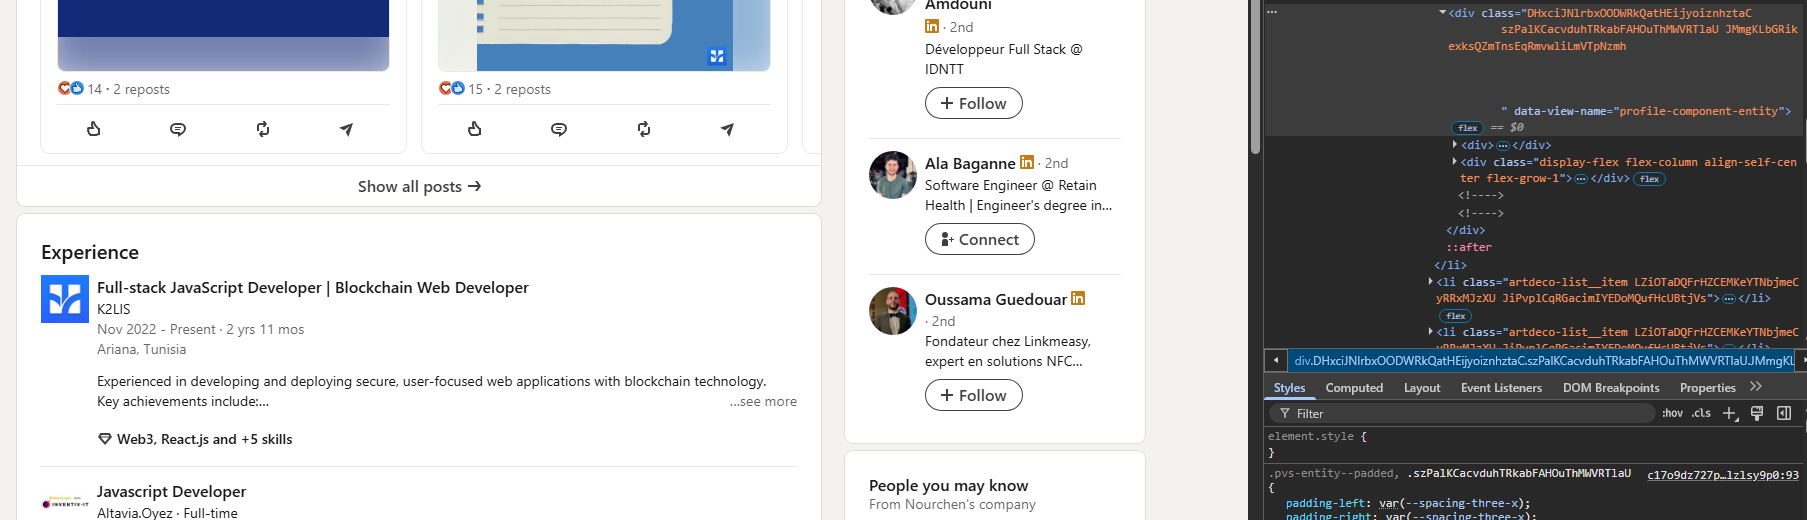
- Check inside the li
- 'DHxciJNlrbxOODWRkQatHEijyoiznhztaC szPalKCacvduhTRkabFAHOuThMWVRTlaU JMmgKLbGRikexksQZmTnsEqRmvwliLmVTpNzmh

In [16]:
# parsing each experience from the section
# experience_entries = experience_section.find_all('div', {'class': 'lYNpJXfUDPedmwAExHyNouKiaGrDNHOCOFnc JdseYAqjrLDtyiCPamTzgqAOuSsoMNwhkhA YEOfsfpxpZNqsVXyvXDWVtfUvhk '''})
LI_EXPERIENCE_CLASS = 'artdeco-list__item JbUlKrwJZIKsPIRsFwTloRqUskJQvmJlyE IwDdCXUNWfBpIItubHorVUPbXlFWhRBg'
experience_entries = experience_section.find_all('li', {'class': LI_EXPERIENCE_CLASS})

experience_entries

[<li class="artdeco-list__item JbUlKrwJZIKsPIRsFwTloRqUskJQvmJlyE IwDdCXUNWfBpIItubHorVUPbXlFWhRBg">
 <!-- --> <div class="rSOTqDWyPZdXLmQnNJFZqSlrYvWHGQTOKhFg AqjnCVfbvycOCvnWwdAXMuPXoOTKuyaoOo omfWdtmGSueoJJCpBpXuHCPOfsGbftlMjAHHefc" data-view-name="profile-component-entity">
 <div>
 <a class="optional-action-target-wrapper pvs-entity__image-container--outline-offset display-flex" data-field="experience_company_logo" href="https://www.linkedin.com/company/4827017/" target="_self">
 <div class="ivm-image-view-model pvs-entity__image">
 <div class="ivm-view-attr__img-wrapper">
 <!-- -->
 <!-- --> <img alt="Upwork logo" class="ivm-view-attr__img--centered EntityPhoto-square-3 evi-image lazy-image ember-view" height="48" id="ember149" loading="lazy" src="https://media.licdn.com/dms/image/v2/D560BAQFHVb6ZSCipCw/company-logo_100_100/company-logo_100_100/0/1727104517379/upwork_logo?e=1762387200&amp;v=beta&amp;t=8Vr6IZp8hDzrlBbR7ruGatx7PS0InsA6MO0gQXyvpz4" width="48"/>
 </div>
 </div>
 </a>


In [37]:
import re
def dedupe_caption(el: bs4.element.Tag) -> str:
    parts = [t.strip() for t in el.find_all(string=True)]
    parts = [p for p in parts if p]
    comp: list[str] = []
    for p in parts:
        if not comp or comp[-1] != p:
            comp.append(p)
    text = " ".join(comp).strip()
    m = re.match(r"^(.+?)\1+$", text)
    if m:
        return m.group(1)
    return text



In [62]:
# assumes `experience_entries` is a list of bs4 elements (as in your output)
from bs4 import BeautifulSoup
import pandas as pd

def text_of(sel):
    return sel.get_text(strip=True) if sel else None
def parse_experience_entries(experience_entries):
    rows = []
    for e in experience_entries:
        # company link & image
        # a_company = e.select_one("a.optional-action-target-wrapper")
        # company_url = a_company["href"] if a_company and a_company.has_attr("href") else None
        # img = e.select_one("img")
        # image_url = img["src"] if img and img.has_attr("src") else None

        # role (bold)
        role = dedupe_caption(e.select_one(".t-bold"))  # e.g. "Intern" or "HR Manager"

        # company + employment type (first t-14 t-normal span)
        comp_and_type = dedupe_caption(e.select_one("span.t-14.t-normal"))
        company = None
        employment_type = None
        if comp_and_type and "·" in comp_and_type:
            company, employment_type = [s.strip() for s in comp_and_type.split("·", 1)]

        # dates / duration
        dates = text_of(e.select_one("span.pvs-entity__caption-wrapper"))
        # location is often another t-14.t-normal.t-black--light span (take the last one)
        black_spans = e.select("span.t-14.t-normal.t-black--light")
        location = dedupe_caption(black_spans[-1]) if black_spans else None

        # description (inline-show-more-text)
        desc = text_of(e.select_one("div.inline-show-more-text--is-collapsed"))

        # # skills (strong inside the subcomponents)
        # skills = text_of(e.select_one("strong"))

        rows.append({
            "role": role,
            "company": company,
            # "company_url": company_url,
            "employment_type": employment_type,
            # "start_end": dates,
            "duration": None if not dates else (dates.split("·")[-1].strip() if "·" in dates else None),
            "location": location,
            "description": desc,
            # "skills": skills,
            # "image_url": image_url
        })
    return rows
rows = parse_experience_entries(experience_entries)
df = pd.DataFrame(rows)
print(df.to_dict(orient="records"))

[{'role': 'Full-stack JavaScript Developer | Blockchain Web Developer', 'company': None, 'employment_type': None, 'duration': '3 yrs', 'location': 'Ariana, Tunisia', 'description': 'Experienced in developing and deploying secure, user-focused web applications with blockchain technology.Key achievements include:- Blockchain-Integrated Applications: Developed web applications leveraging blockchain for transparent and secure operations. Utilized Web3 to deploy and manage smart contracts on the Ethereum blockchain, ensuring reliable and trustworthy transactions.- Frontend Development: Created intuitive and responsive user interfaces with React.js and Next.js, using Tailwind CSS to achieve clean, modern designs and real-time updates for an optimized user experience.- Backend Infrastructure: Implemented a robust backend in Node.js for efficient and secure data management in blockchain environments, enhancing overall system stability.- AWS Deployment: Deployed applications on AWS, enabling sc

In [60]:
df

role       company  \
0  Full-stack JavaScript Developer | Blockchain W...          None   
1                               Javascript Developer  Altavia.Oyez   
2                      Graduation Project Internship          None   

                                  company_url employment_type duration  \
0  https://www.linkedin.com/company/30153222/            None    3 yrs   
1    https://www.linkedin.com/company/962853/       Full-time    5 mos   
2  https://www.linkedin.com/company/78622396/            None    5 mos   

          location                                        description  
0  Ariana, Tunisia  Experienced in developing and deploying secure...  
1   Tunis, Tunisia  Conducted data extraction from a diverse range...  
2   Tunis, Tunisia  DeepVolt is an AI-driven startup specializing ...

In [40]:
from copy import deepcopy as dc

In [41]:
json_experience = dc(rows)
json_experience

[{'role': 'Full-stack JavaScript Developer | Blockchain Web Developer',
  'company': None,
  'employment_type': None,
  'duration': '3 yrs',
  'location': 'Ariana, Tunisia',
  'description': 'Experienced in developing and deploying secure, user-focused web applications with blockchain technology.Key achievements include:- Blockchain-Integrated Applications: Developed web applications leveraging blockchain for transparent and secure operations. Utilized Web3 to deploy and manage smart contracts on the Ethereum blockchain, ensuring reliable and trustworthy transactions.- Frontend Development: Created intuitive and responsive user interfaces with React.js and Next.js, using Tailwind CSS to achieve clean, modern designs and real-time updates for an optimized user experience.- Backend Infrastructure: Implemented a robust backend in Node.js for efficient and secure data management in blockchain environments, enhancing overall system stability.- AWS Deployment: Deployed applications on AWS, e

In [128]:
df

role       company  \
0  Full-stack JavaScript Developer | Blockchain W...          None   
1           Javascript DeveloperJavascript Developer  Altavia.Oyez   
2  Graduation Project InternshipGraduation Projec...          None   

                                  company_url  \
0  https://www.linkedin.com/company/30153222/   
1    https://www.linkedin.com/company/962853/   
2  https://www.linkedin.com/company/78622396/   

                     employment_type                          start_end  \
0                               None  Nov 2022 - Present · 2 yrs 11 mos   
1  Full-timeAltavia.Oyez · Full-time        Jun 2022 - Oct 2022 · 5 mos   
2                               None        Feb 2022 - Jun 2022 · 5 mos   

       duration                        location  \
0  2 yrs 11 mos  Ariana, TunisiaAriana, Tunisia   
1         5 mos    Tunis, TunisiaTunis, Tunisia   
2         5 mos    Tunis, TunisiaTunis, Tunisia   

                                         description  \
0  Experienced in developing and deploying secure...   
1  Conducted data extraction from a diverse range...   
2  DeepVolt is an AI-driven startup specializing ...   

                               skills  \
0        Web3, React.js and +5 skills   
1  Javascript and Regular Expressions   
2      React.js, Mapbox and +4 skills   

                                           image_url  
0  https://media.licdn.com/dms/image/v2/C4D0BAQHV...  
1  https://media.licdn.com/dms/image/v2/D4E0BAQGr...  
2  https://media.licdn.com/dms/image/v2/C4E0BAQGx...

# Education section

In [42]:
# get education by ID
for sec in sections:
    if sec.find('div', {'id': 'education'}):
        education_section = sec
        break
education_section

<section class="artdeco-card pv-profile-card break-words mt2" data-view-name="profile-card" tabindex="-1">
<!-- -->
<div class="pv-profile-card__anchor" id="education">
</div>
<!-- -->
<!-- -->
<div class="hFcupvQENsQbfxVOjIFwbSPVKZJdZgoyFOk">
<div class="pvs-header__top-container--no-stack">
<div class="pvs-header__left-container--stack">
<div class="xbVymWoXomAxgzhVDLgQIJXyxZcejpTMqCUhOEYk">
<!-- --> <h2 class="pvs-header__title text-heading-large">
<span aria-hidden="true"><!-- -->Education<!-- --></span><span class="visually-hidden"><!-- -->Education<!-- --></span>
</h2>
<!-- --><!-- --> </div>
<!-- --> </div>
<!-- --> </div>
</div>
<div class="BuWbDyEYoExdmTElfGOZJIVnqzzxxCiyvVKFOg">
<!-- --> <ul class="HFxGSzNbHgMyUkGOnWmwSWZYCLarGAIhnnJIXRLBA">
<li class="artdeco-list__item JRPdoVshKGfiTzzMYDdHvTeUIHvxENhPrsqPfebg VAmjvDMRmRgbJHKHBrOBRhHZbsHsHec">
<!-- --> <div class="lYNpJXfUDPedmwAExHyNouKiaGrDNHOCOFnc JdseYAqjrLDtyiCPamTzgqAOuSsoMNwhkhA YEOfsfpxpZNqsVXyvXDWVtfUvhk" data-view-

In [43]:
# python
# parse education_section (bs4 element) -> list[dict] + DataFrame
from bs4 import BeautifulSoup
import pandas as pd

def text_of(sel):
    return sel.get_text(strip=True) if sel else None

def parse_education(education_section):
    entries = education_section.find_all('div', {'data-view-name': 'profile-component-entity'})
    rows = []
    for e in entries:
        a = e.select_one('a.optional-action-target-wrapper')
        institution_url = a['href'] if a and a.has_attr('href') else None

        img = e.select_one('img')
        image_url = img['src'] if img and img.has_attr('src') else None

        institution = text_of(e.select_one('.t-bold')) or text_of(a)
        field_of_study = text_of(e.select_one('span.t-14.t-normal'))
        dates = text_of(e.select_one('span.pvs-entity__caption-wrapper'))
        # duration not always present; keep None for now
        duration = None

        # description / grade
        grade_desc = text_of(e.select_one('div.inline-show-more-text--is-collapsed'))
        grade = None
        if grade_desc and 'Grade:' in grade_desc:
            # capture everything after 'Grade:'
            grade = grade_desc.split('Grade:', 1)[1].strip()
        description = text_of(e.select_one('div.display-flex full-width'))

        rows.append({
            'institution': institution,
            'institution_url': institution_url,
            'image_url': image_url,
            'field_of_study': field_of_study,
            'start_end': dates,
            'duration': duration,
            'grade': grade,
            'description': description
        })

    df = pd.DataFrame(rows)
    return rows, df

# example usage
rows, df_education = parse_education(education_section)
print(rows)
df_education

[{'institution': 'MIT PolytechMIT Polytech', 'institution_url': 'https://www.linkedin.com/search/results/all/?keywords=MIT+Polytech', 'image_url': None, 'field_of_study': "Engineer's degree, Computer scienceEngineer's degree, Computer science", 'start_end': '2020 - 2022', 'duration': None, 'grade': None, 'description': None}, {'institution': 'GOMYCODEGOMYCODE', 'institution_url': 'https://www.linkedin.com/company/10862694/', 'image_url': 'https://media.licdn.com/dms/image/v2/C4D0BAQGQiRGb69VRqA/company-logo_100_100/company-logo_100_100/0/1630544506185/go_my_code_logo?e=1762387200&v=beta&t=QuAzgpy17NCUrF27ahb9K_rZGK9qX-ZuTPoFSVBTgkw', 'field_of_study': 'Certificat, Full Stack JS (MERN)Certificat, Full Stack JS (MERN)', 'start_end': '2020 - 2021', 'duration': None, 'grade': None, 'description': None}]


institution  \
0  MIT PolytechMIT Polytech   
1          GOMYCODEGOMYCODE   

                                     institution_url  \
0  https://www.linkedin.com/search/results/all/?k...   
1         https://www.linkedin.com/company/10862694/   

                                           image_url  \
0                                               None   
1  https://media.licdn.com/dms/image/v2/C4D0BAQGQ...   

                                      field_of_study    start_end duration  \
0  Engineer's degree, Computer scienceEngineer's ...  2020 - 2022     None   
1  Certificat, Full Stack JS (MERN)Certificat, Fu...  2020 - 2021     None   

  grade description  
0  None        None  
1  None        None

In [131]:
json_education = dc(rows)
json_education

[{'institution': 'MIT PolytechMIT Polytech',
  'institution_url': 'https://www.linkedin.com/search/results/all/?keywords=MIT+Polytech',
  'image_url': None,
  'field_of_study': "Engineer's degree, Computer scienceEngineer's degree, Computer science",
  'start_end': '2020 - 2022',
  'duration': None,
  'grade': None,
  'description': None},
 {'institution': 'GOMYCODEGOMYCODE',
  'institution_url': 'https://www.linkedin.com/company/10862694/',
  'image_url': 'https://media.licdn.com/dms/image/v2/C4D0BAQGQiRGb69VRqA/company-logo_100_100/company-logo_100_100/0/1630544506185/go_my_code_logo?e=1761782400&v=beta&t=e5JVItA1kBgmcgFKe6aFzmLQ97JrvpdZRgRy1QxB6HI',
  'field_of_study': 'Certificat, Full Stack JS (MERN)Certificat, Full Stack JS (MERN)',
  'start_end': '2020 - 2021',
  'duration': None,
  'grade': None,
  'description': 'It is an intensive training of 4 months to become a fullstack web developer on Javascript technologies (React JS, Node JS, MongoDB, Express, Mongoose, JWT ...).It is 

# languages section

In [44]:
# get languages by ID
for sec in sections:
    if sec.find('div', {'id': 'languages'}):
        languages_section = sec
        break
languages_section

<section class="artdeco-card pv-profile-card break-words mt2" data-view-name="profile-card" tabindex="-1">
<!-- -->
<div class="pv-profile-card__anchor" id="languages">
</div>
<!-- -->
<!-- -->
<div class="hFcupvQENsQbfxVOjIFwbSPVKZJdZgoyFOk">
<div class="pvs-header__top-container--no-stack">
<div class="pvs-header__left-container--stack">
<div class="xbVymWoXomAxgzhVDLgQIJXyxZcejpTMqCUhOEYk">
<!-- --> <h2 class="pvs-header__title text-heading-large">
<span aria-hidden="true"><!-- -->Languages<!-- --></span><span class="visually-hidden"><!-- -->Languages<!-- --></span>
</h2>
<!-- --><!-- --> </div>
<!-- --> </div>
<!-- --> </div>
</div>
<div class="BuWbDyEYoExdmTElfGOZJIVnqzzxxCiyvVKFOg">
<!-- --> <ul class="HFxGSzNbHgMyUkGOnWmwSWZYCLarGAIhnnJIXRLBA">
<li class="artdeco-list__item JRPdoVshKGfiTzzMYDdHvTeUIHvxENhPrsqPfebg VAmjvDMRmRgbJHKHBrOBRhHZbsHsHec">
<!-- --> <div class="lYNpJXfUDPedmwAExHyNouKiaGrDNHOCOFnc JdseYAqjrLDtyiCPamTzgqAOuSsoMNwhkhA YEOfsfpxpZNqsVXyvXDWVtfUvhk" data-view-

In [45]:
import re
import pandas as pd

def parse_languages(languages_section):
    entries = languages_section.find_all('div', {'data-view-name': 'profile-component-entity'})
    rows = []
    for e in entries:
        lang_raw = text_of(e.select_one('.t-bold'))
        proficiency = text_of(e.select_one('span.pvs-entity__caption-wrapper'))

        language = None
        level = None
        if lang_raw:
            m = re.match(r'^(?P<lang>[^(]+?)\s*(\((?P<lvl>.+?)\))?$', lang_raw)
            if m:
                language = m.group('lang').strip()
                lvl = m.group('lvl')
                if lvl:
                    level = lvl.strip()

        # fallback: use the proficiency caption as level if no explicit lvl
        if not level:
            level = proficiency

        rows.append({
            'language': language or lang_raw,
            'level': level,
            'proficiency_caption': proficiency
        })

    df = pd.DataFrame(rows)
    show_all = languages_section.select_one('a#navigation-index-see-all-languages')
    show_all_url = show_all['href'] if show_all and show_all.has_attr('href') else None
    return rows, df, show_all_url

# example usage
rows, df_languages, show_all_url = parse_languages(languages_section)
print(rows)
df_languages

[{'language': 'ArabicArabic', 'level': 'Native or bilingual proficiency', 'proficiency_caption': 'Native or bilingual proficiency'}, {'language': 'EnglishEnglish', 'level': 'Professional working proficiency', 'proficiency_caption': 'Professional working proficiency'}]


language                             level  \
0    ArabicArabic   Native or bilingual proficiency   
1  EnglishEnglish  Professional working proficiency   

                proficiency_caption  
0   Native or bilingual proficiency  
1  Professional working proficiency

## Explore hiddinlanguages section

In [46]:
# driver.get(FULL_CANDIDATES_LIST[0]+'/details/languages/')  # Replace with the target URL
driver.get('https://www.linkedin.com/in/nourchen-noamen/details/languages/')  # Replace with the target URL


In [47]:
languages_page_source = driver.page_source

languages_soup = bs4.BeautifulSoup(languages_page_source, 'lxml')
languages_soup

<html class="theme theme--mercado app-loader--default artdeco windows" lang="en"><head><meta content="A7vZI3v+Gz7JfuRolKNM4Aff6zaGuT7X0mf3wtoZTnKv6497cVMnhy03KDqX7kBz/q/iidW7srW31oQbBt4VhgoAAACUeyJvcmlnaW4iOiJodHRwczovL3d3dy5nb29nbGUuY29tOjQ0MyIsImZlYXR1cmUiOiJEaXNhYmxlVGhpcmRQYXJ0eVN0b3JhZ2VQYXJ0aXRpb25pbmczIiwiZXhwaXJ5IjoxNzU3OTgwODAwLCJpc1N1YmRvbWFpbiI6dHJ1ZSwiaXNUaGlyZFBhcnR5Ijp0cnVlfQ==" http-equiv="origin-trial"/>
<meta content="script-src 'report-sample' 'strict-dynamic' 'nonce-X0tPKyCeeqflT3W4jlTeLQ'; script-src-attr 'none'" http-equiv="Content-Security-Policy"/>
<script async="" charset="utf-8" crossorigin="anonymous" integrity="sha384-Favr7vFIBo/+ruj/aVntsNMFZCKhrSm5l7oEO+HHTCa4qjhPlnHiz0CxvTwXMoTZ" nonce="" src="https://www.gstatic.com/recaptcha/releases/Jv8jlA-BQE5JD6rA-h_iqNH2/recaptcha__en.js" type="text/javascript"></script><script nonce="">!function(i,n){void 0!==i.addEventListener&&void 0!==i.hidden&&(n.liVisibilityChangeListener=function(){i.hidden&&(n.liHasWindowHidd

In [48]:
parse_languages(languages_soup)

([{'language': 'ArabicArabic',
   'level': 'Native or bilingual proficiency',
   'proficiency_caption': 'Native or bilingual proficiency'},
  {'language': 'EnglishEnglish',
   'level': 'Professional working proficiency',
   'proficiency_caption': 'Professional working proficiency'},
  {'language': 'FrenshFrensh',
   'level': 'Full professional proficiency',
   'proficiency_caption': 'Full professional proficiency'}],
          language                             level  \
 0    ArabicArabic   Native or bilingual proficiency   
 1  EnglishEnglish  Professional working proficiency   
 2    FrenshFrensh     Full professional proficiency   
 
                 proficiency_caption  
 0   Native or bilingual proficiency  
 1  Professional working proficiency  
 2     Full professional proficiency  ,
 None)

In [49]:
# expects: bs4 imported, languages_section or languages_soup present
# fallback simple text_of


# choose source element
src = languages_soup
def parse_languages(src):
    lang_mapper = {
    "elementary proficiency": 0,
    "limited working proficiency": 1,
    "professional working proficiency": 1,
    "full professional proficiency": 2,
    "native or bilingual proficiency": 2
    }
    def text_of(sel):
        return sel.get_text(strip=True) if sel else None


    # per-language entries (best paired by the profile-component-entity container)
    rows = []
    for e in src.find_all('div', {'data-view-name': 'profile-component-entity'}):
        # name = text_of(e.select_one('.t-bold'))
        hidden = text_of(e.select_one('span.visually-hidden'))
        caption = text_of(e.select_one('span.pvs-entity__caption-wrapper'))
        
        # if caption non then not a language 
        if not caption:
            continue
        rows.append({'language': hidden, 'level': lang_mapper[caption.lower()]})
    return rows


import pandas as pd
df_langs = pd.DataFrame(parse_languages(src))

# print("visually_hidden spans:", vis_hidden)
# print("caption spans:", captions)
print("parsed rows:", rows)
df_langs

parsed rows: [{'language': 'ArabicArabic', 'level': 'Native or bilingual proficiency', 'proficiency_caption': 'Native or bilingual proficiency'}, {'language': 'EnglishEnglish', 'level': 'Professional working proficiency', 'proficiency_caption': 'Professional working proficiency'}]


language  level
0   Arabic      2
1  English      1
2   Frensh      2

In [50]:
lang_mapper = {
    "elementary proficiency": 0,
    "limited working proficiency": 1,
    "professional working proficiency": 1,
    "full professional proficiency": 2,
    "native or bilingual proficiency": 2
    }


languages

In [37]:
json_languages = dc(rows)
json_languages

NameError: name 'dc' is not defined

# Lets get the skills section

In [51]:
# driver.get(FULL_CANDIDATES_LIST[0]+'/details/skills/')  # Replace with the target URL
driver.get('https://www.linkedin.com/in/nourchen-noamen/details/skills/')  # Replace with the target URL

In [284]:
skills_soup

<html class="theme theme--mercado app-loader--default artdeco windows" lang="en"><head><meta content="A7vZI3v+Gz7JfuRolKNM4Aff6zaGuT7X0mf3wtoZTnKv6497cVMnhy03KDqX7kBz/q/iidW7srW31oQbBt4VhgoAAACUeyJvcmlnaW4iOiJodHRwczovL3d3dy5nb29nbGUuY29tOjQ0MyIsImZlYXR1cmUiOiJEaXNhYmxlVGhpcmRQYXJ0eVN0b3JhZ2VQYXJ0aXRpb25pbmczIiwiZXhwaXJ5IjoxNzU3OTgwODAwLCJpc1N1YmRvbWFpbiI6dHJ1ZSwiaXNUaGlyZFBhcnR5Ijp0cnVlfQ==" http-equiv="origin-trial"/>
<meta content="script-src 'report-sample' 'strict-dynamic' 'nonce-z1F6qRi6D2wLAQSL0rI-LQ'; script-src-attr 'none'" http-equiv="Content-Security-Policy"/>
<script async="" charset="utf-8" crossorigin="anonymous" integrity="sha384-QqfebjEuIgnKX+GxU4cN+byIJWmt6PLd1Lhx1lDrZnC9qHnUqKxROgib38rfVJzS" nonce="" src="https://www.gstatic.com/recaptcha/releases/XrIDux0s7SoNe6_IHkjGC92W/recaptcha__en.js" type="text/javascript"></script><script nonce="">!function(i,n){void 0!==i.addEventListener&&void 0!==i.hidden&&(n.liVisibilityChangeListener=function(){i.hidden&&(n.liHasWindowHidd

In [52]:
skills_page_source = driver.page_source

skills_soup = bs4.BeautifulSoup(skills_page_source, 'lxml')
skills_soup


<html class="theme theme--mercado app-loader--default artdeco windows" lang="en"><head><meta content="A7vZI3v+Gz7JfuRolKNM4Aff6zaGuT7X0mf3wtoZTnKv6497cVMnhy03KDqX7kBz/q/iidW7srW31oQbBt4VhgoAAACUeyJvcmlnaW4iOiJodHRwczovL3d3dy5nb29nbGUuY29tOjQ0MyIsImZlYXR1cmUiOiJEaXNhYmxlVGhpcmRQYXJ0eVN0b3JhZ2VQYXJ0aXRpb25pbmczIiwiZXhwaXJ5IjoxNzU3OTgwODAwLCJpc1N1YmRvbWFpbiI6dHJ1ZSwiaXNUaGlyZFBhcnR5Ijp0cnVlfQ==" http-equiv="origin-trial"/>
<meta content="script-src 'report-sample' 'strict-dynamic' 'nonce-qMiLE0-VNwXwcpx33Jg_og'; script-src-attr 'none'" http-equiv="Content-Security-Policy"/>
<script async="" charset="utf-8" crossorigin="anonymous" integrity="sha384-Favr7vFIBo/+ruj/aVntsNMFZCKhrSm5l7oEO+HHTCa4qjhPlnHiz0CxvTwXMoTZ" nonce="" src="https://www.gstatic.com/recaptcha/releases/Jv8jlA-BQE5JD6rA-h_iqNH2/recaptcha__en.js" type="text/javascript"></script><script nonce="">!function(i,n){void 0!==i.addEventListener&&void 0!==i.hidden&&(n.liVisibilityChangeListener=function(){i.hidden&&(n.liHasWindowHidd

In [53]:
# get the inner part of the div with id "ember45"
ember_div = skills_soup.find('section', class_='artdeco-card pb3')

# raw bs4 element (None if not found)
ember_div
# inner HTML (string) and plain text
ember_html = ember_div.decode_contents() if ember_div else None
ember_text = ember_div.get_text(separator=' ', strip=True) if ember_div else None

print("found:", bool(ember_div))
print("html length:", len(ember_html) if ember_html else 0)
print("text preview:", (ember_text[:200] + '...') if ember_text and len(ember_text) > 200 else ember_text)

found: True
html length: 156839
text preview: Skills All Industry Knowledge Tools & Technologies web3.js web3.js DSHARE DSHARE ALECSO NFT ALECSO NFT Tailwind CSS Tailwind CSS DSHARE DSHARE ALECSO NFT ALECSO NFT NextAuth.js NextAuth.js AGAI AGAI G...


In [54]:
# expects: bs4 imported, languages_section or skills_page_source present
# fallback simple text_of
def text_of(sel):
    return sel.get_text(strip=True) if sel else None

# choose source element
src = ember_div

# captions = [dedupe_caption(s.get_text(strip=True)) for s in src.find_all('div', class_='display-flex flex-wrap align-items-center full-height')]
def dedupe_caption(el):
    # gather all text nodes in order, strip empties
    parts = [t.strip() for t in el.find_all(string=True)]
    parts = [p for p in parts if p]
    # remove adjacent duplicate segments
    comp = []
    for p in parts:
        if not comp or comp[-1] != p:
            comp.append(p)
    text = " ".join(comp).strip()

    # collapse repeated whole-string patterns like "abcabc" or "xxyxxxyx" -> keep base if exact repetitions
    import re
    m = re.match(r'^(.+?)\1+$', text)
    if m:
        return m.group(1)
    return text

def parse_skills(src):
    skills = list(set(dedupe_caption(s) for s in src.find_all('div', class_='display-flex flex-wrap align-items-center full-height')))
    return ' '.join(skills)


In [55]:
parse_skills(ember_div)

'Express.js Web3 Next.js Docker React.js JS Google Drive API AWS Mapbox Javascript Regular Expressions Scrum NextAuth.js Tailwind CSS web3.js Expressions régulières MongoDB Node.js FAST API Linux'

In [174]:
json_languages = dc(rows)
json_languages

[]

# content extraction function

In [ ]:
# we are gouing to ge the work exp, education , languages and skills of each candidate in the FULL_CANDIDATES_LIST
lang_mapper = {
    "elementary proficiency": 0,
    "limited working proficiency": 1,
    "professional working proficiency": 1,
    "full professional proficiency": 2,
    "native or bilingual proficiency": 2
    }
def dedupe_caption(el):
    # gather all text nodes in order, strip empties
    parts = [t.strip() for t in el.find_all(string=True)]
    parts = [p for p in parts if p]
    # remove adjacent duplicate segments
    comp = []
    for p in parts:
        if not comp or comp[-1] != p:
            comp.append(p)
    text = " ".join(comp).strip()

    # collapse repeated whole-string patterns like "abcabc" or "xxyxxxyx" -> keep base if exact repetitions
    import re
    m = re.match(r'^(.+?)\1+$', text)
    if m:
        return m.group(1)
    return text

def candidate_info_extractor(candidate_link, driver=driver):
    driver.get(candidate_link)
    
    # time.sleep(15)  # wait for the page to load
    page_source = driver.page_source
    soup = bs4.BeautifulSoup(page_source, 'lxml')

    global sections
    # artdeco-card pv-profile-card break-words mt2
    sections = soup.find_all('section', {'class': '''artdeco-card pv-profile-card break-words mt2'''})
    experience_section = None
    # Extract experience
    for sec in sections:
        if sec.find('div', {'id': 'experience'}):
            experience_section = sec
            break
    if experience_section:
        experience_entries = experience_section.find_all('li', {'class': LI_EXPERIENCE_CLASS})
        
        experience_rows = parse_experience_entries(experience_entries) 
    else:
        experience_rows = []

    # Extract education
    for sec in sections:
        if sec.find('div', {'id': 'education'}):
            education_section = sec
            break
    education_rows, _ = parse_education(education_section)

    # Extract languages
    driver.get(candidate_link + '/details/languages/')
    time.sleep(5)  # wait for the page to load
    languages_page_source = driver.page_source
    
    languages_soup = bs4.BeautifulSoup(languages_page_source, 'lxml')

    languages_rows = parse_languages(languages_soup) 

    
    
    # Extract skills
    driver.get(candidate_link + '/details/skills/')
    # time.sleep(5)  # wait for the page to load

    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, 'section.artdeco-card.pb3'))
    )
    skills_page_source = driver.page_source
    skills_soup = bs4.BeautifulSoup(skills_page_source, 'lxml')
    ember_div = skills_soup.find('section', class_='artdeco-card pb3')
    
    if ember_div:
        skills_row = parse_skills(ember_div)
    else:
        print('couldnt find skills div')
        skills_row = parse_skills(skills_soup)

    return {
        'experience': experience_rows,
        'education': education_rows,
        'languages': languages_rows,
        'skills': skills_row
    }


In [94]:
Name = 'youssef-ghaoui'
linkedin_cv_json = candidate_info_extractor(f'https://www.linkedin.com/in/{Name}/')
linkedin_cv_json

couldnt find skills div


{'experience': [{'role': 'Artificial Intelligence Engineer',
   'company': 'Upwork',
   'employment_type': 'Freelance',
   'duration': '2 mos',
   'location': 'Remote',
   'description': None},
  {'role': 'AI Engineer (R&D)',
   'company': 'Pearls Consulting Tunisia',
   'employment_type': 'Internship',
   'duration': '4 mos',
   'location': 'Tunis, Tunisia · Hybrid',
   'description': 'Developed and deployed a real-time AI pipeline for automated PPE safety inspections. The system combined computer vision (YOLO + SAM), vision-language reasoning, and multi-agent coordination to detect violations and generate structured safety reports.Key Achievements:🚀 Boosted violation detection accuracy by 10.2% through VLM + SAM integration.📄 Automated markdown/PDF safety report generation with reasoning agents.🐳 Scaled deployment on DigitalOcean using Docker + FastAPI.🔎 Logged agent behavior via MCP framework, enabling traceability and modular growth.Developed and deployed a real-time AI pipeline fo

In [106]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

def wait_for_element(driver, by, value, timeout=10):
    try:
        return WebDriverWait(driver, timeout).until(
            EC.presence_of_element_located((by, value))
        )
    except TimeoutException:
        return None

def candidate_info_extractor(candidate_link, driver):
    # Visit main profile page
    driver.get(candidate_link)
    wait_for_element(driver, By.TAG_NAME, "body")  # Wait for general body load

    soup = bs4.BeautifulSoup(driver.page_source, 'lxml')
    sections = soup.find_all('section', {'class': 'artdeco-card pv-profile-card break-words mt2'})

    # ----- Experience -----
    experience_rows = []
    for sec in sections:
        if sec.find('div', {'id': 'experience'}):
            experience_entries = sec.find_all('li', {'class': LI_EXPERIENCE_CLASS})
            experience_rows = parse_experience_entries(experience_entries)
            break  # Stop once found

    # ----- Education -----
    education_rows = []
    for sec in sections:
        if sec.find('div', {'id': 'education'}):
            education_rows, _ = parse_education(sec)
            break

    # ----- Languages -----
    driver.get(candidate_link + '/details/languages/')
    wait_for_element(driver, By.CSS_SELECTOR, 'section.artdeco-card')  # wait for language section

    languages_soup = bs4.BeautifulSoup(driver.page_source, 'lxml')
    languages_rows = parse_languages(languages_soup)

    # ----- Skills -----
    driver.get(candidate_link + '/details/skills/')
    wait_for_element(driver, By.CSS_SELECTOR, 'section.artdeco-card.pb3')  # wait for skills section

    skills_soup = bs4.BeautifulSoup(driver.page_source, 'lxml')
    ember_div = skills_soup.find('section', class_='artdeco-card pb3')

    if ember_div:
        skills_row = parse_skills(ember_div)
    else:
        print(f"[WARN] Couldn't find skills section for {candidate_link}")
        skills_row = parse_skills(skills_soup)

    return {
        'experience': experience_rows,
        'education': education_rows,
        'languages': languages_rows,
        'skills': skills_row
    }


In [122]:
Name = 'youssef-ghaoui'
linkedin_cv_json = candidate_info_extractor(f'https://www.linkedin.com/in/{Name}/', driver)
linkedin_cv_json

{'experience': [{'role': 'Artificial Intelligence Engineer',
   'company': 'Upwork',
   'employment_type': 'Freelance',
   'duration': '2 mos',
   'location': 'Remote',
   'description': None},
  {'role': 'AI Engineer (R&D)',
   'company': 'Pearls Consulting Tunisia',
   'employment_type': 'Internship',
   'duration': '4 mos',
   'location': 'Tunis, Tunisia · Hybrid',
   'description': 'Developed and deployed a real-time AI pipeline for automated PPE safety inspections. The system combined computer vision (YOLO + SAM), vision-language reasoning, and multi-agent coordination to detect violations and generate structured safety reports.Key Achievements:🚀 Boosted violation detection accuracy by 10.2% through VLM + SAM integration.📄 Automated markdown/PDF safety report generation with reasoning agents.🐳 Scaled deployment on DigitalOcean using Docker + FastAPI.🔎 Logged agent behavior via MCP framework, enabling traceability and modular growth.Developed and deployed a real-time AI pipeline fo

---

In [ ]:
# Extract skills
driver.get(f'https://www.linkedin.com/in/{Name}' + '/details/skills/')
time.sleep(5)  # wait for the page to load
#
skills_page_source = driver.page_source
skills_soup = bs4.BeautifulSoup(skills_page_source, 'lxml')
ember_div = skills_soup.find('section', class_='artdeco-card pb3')

if ember_div:
    skills_row = parse_skills(ember_div)
else:
    print('couldnt find skills div')

In [100]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Navigate to the skills page
driver.get(f'https://www.linkedin.com/in/{Name}' + '/details/skills/')

# Wait for the skills section to load (wait for an element in the skills section to be present)
try:
    # Wait up to 5 seconds for the skills section to be visible
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, 'section.artdeco-card.pb3'))
    )
    # Now the page is loaded, we can scrape
    skills_page_source = driver.page_source
    skills_soup = bs4.BeautifulSoup(skills_page_source, 'lxml')
    ember_div = skills_soup.find('section', class_='artdeco-card pb3')

    if ember_div:
        skills_row = parse_skills(ember_div)
    else:
        print('couldnt find skills div')
except TimeoutException:
    print("Timed out waiting for skills section to load.")

In [98]:
skills_row

'Debugging Recurrent Neural Networks (RNN) Analytical Skills Large Language Models (LLM) Python (Programming Language) Pandas (Software) mcp Style Transfer Creativity and Innovation Generative Art Decision-Making Spoken English Pruning Communication Attention to Detail Problem Solving PostgreSQL SQL Leadership Customer Relationship Management (CRM) System Deployment Jupyter Chemistry Adaptation Physics MLOps TensorFlow Prompt Engineering Retrieval-Augmented Generation (RAG) BERT (Language Model) English Generative Adversarial Networks (GANs) Java Optical Character Recognition (OCR) Fine Tuning Reinforcement Learning C# IBM Servers AI Agents PyTorch Feature Engineering Team Leadership docker PiNN Generative AI Creative Problem Solving Cloud Computing Project Planning Optimization'

In [312]:
Name = 'nourchen-noamen'
linkedin_cv_json = candidate_info_extractor(f'https://www.linkedin.com/in/{Name}/')
linkedin_cv_json

{'experience': [{'role': 'Full-stack JavaScript Developer | Blockchain Web DeveloperFull-stack JavaScript Developer | Blockchain Web Developer',
   'company': None,
   'company_url': 'https://www.linkedin.com/company/30153222/',
   'employment_type': None,
   'start_end': 'Nov 2022 - Present · 2 yrs 11 mos',
   'duration': '2 yrs 11 mos',
   'location': 'Ariana, TunisiaAriana, Tunisia',
   'description': 'Experienced in developing and deploying secure, user-focused web applications with blockchain technology.Key achievements include:- Blockchain-Integrated Applications: Developed web applications leveraging blockchain for transparent and secure operations. Utilized Web3 to deploy and manage smart contracts on the Ethereum blockchain, ensuring reliable and trustworthy transactions.- Frontend Development: Created intuitive and responsive user interfaces with React.js and Next.js, using Tailwind CSS to achieve clean, modern designs and real-time updates for an optimized user experience.- 

In [290]:
driver.get(f'https://www.linkedin.com/in/{Name}/' + '/details/skills/')


In [252]:
ember_div

<div class="artdeco-entity-lockup__content ember-view overflow-hidden ml1 align-self-flex-start" id="ember45">
<div class="artdeco-entity-lockup__title ember-view" id="ember46">
            Youssef Ghaoui
<!-- -->
</div>
<div class="artdeco-entity-lockup__subtitle ember-view truncate" id="ember47">
            AI Engineer | Turning LLMs &amp; Multi-Agent Systems into Scalable Real-World Solutions | CS Engineering Master’s
          </div>
</div>

In [253]:
parse_skills(ember_div)

''

In [296]:
# time.sleep(15)  # wait for the page to load
skills_page_source = driver.page_source
skills_soup = bs4.BeautifulSoup(skills_page_source, 'lxml')
ember_div = skills_soup.find('div', id='ember64')

if ember_div:
    skills_row = parse_skills(ember_div)
skills_row

'Physics Chemistry Cloud Computing Reinforcement Learning Prompt Engineering docker mcp Optical Character Recognition (OCR) Customer Relationship Management (CRM) IBM Servers AI Agents PiNN PyTorch Retrieval-Augmented Generation (RAG) Generative Art Style Transfer Generative AI Generative Adversarial Networks (GANs) Project Planning System Deployment'

In [300]:
driver.get(f'https://www.linkedin.com/in/{Name}/' + '/details/skills/')


In [202]:
ember_div

In [308]:
skills_page_source = driver.page_source
skills_soup = bs4.BeautifulSoup(skills_page_source, 'lxml')
ember_div = skills_soup.find('section', class_='artdeco-card pb3')

skills = parse_skills(ember_div)
skills

'Physics Chemistry Cloud Computing Reinforcement Learning Prompt Engineering docker mcp Optical Character Recognition (OCR) Customer Relationship Management (CRM) IBM Servers AI Agents PiNN PyTorch Retrieval-Augmented Generation (RAG) Generative Art Style Transfer Generative AI Generative Adversarial Networks (GANs) Project Planning System Deployment Physics Chemistry Cloud Computing Reinforcement Learning Prompt Engineering Optical Character Recognition (OCR) Customer Relationship Management (CRM) IBM Servers Generative Art Generative Adversarial Networks (GANs) Project Planning System Deployment MLOps Debugging Large Language Models (LLM) Pruning Fine Tuning Optimization Adaptation Feature Engineering docker PyTorch BERT (Language Model) Jupyter Recurrent Neural Networks (RNN) TensorFlow Java PostgreSQL Pandas (Software) Python (Programming Language) SQL C# Decision-Making Creative Problem Solving Creativity and Innovation Team Leadership Attention to Detail Analytical Skills Communi

In [305]:
dedupe_caption(skills)

AttributeError: 'str' object has no attribute 'find_all'

In [299]:
rows

[]

In [162]:
linkedin_cv_json = candidate_info_extractor('https://www.linkedin.com/in/nourchen-noamen/')



AttributeError: 'dict' object has no attribute 'to_dict'

In [313]:
import json
# save it as json file

with open(f'{Name}_profile.json', 'w') as f:
    json.dump(linkedin_cv_json, f, indent=2)

# Headless testing

In [325]:
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
# chrome_options.add_argument("--disable-dev-shm-usage")
# chrome_options.add_argument("--disable-gpu")
# chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-infobars")

driver = webdriver.Chrome(service=service, options=chrome_options,)
driver.get('https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin')  # Replace with the target URL
    # Wait until the element is present
element = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "username"))
)
print("Page is ready!") 
username = driver.find_element(By.ID, "username")
password = driver.find_element(By.ID, "password")
username.send_keys(LK_USERNAME)
password.send_keys(LK_PASSWORD)
login_button = driver.find_element(By.XPATH, '//*[@type="submit"]')
login_button.click()
time.sleep(5)  # wait for 5 seconds to ensure the page loads
print("Login successful!")

Page is ready!
Login successful!


In [ ]:
linkedin_cv_json = candidate_info_extractor('https://www.linkedin.com/in/saber-chadded-36552b192/')


KeyboardInterrupt: 

In [337]:

linkedin_cv_json

{'experience': [{'role': 'Software EngineerSoftware Engineer',
   'company': 'BFI Groupe',
   'company_url': 'https://www.linkedin.com/company/19215745/',
   'employment_type': 'Full-timeBFI Groupe · Full-time',
   'start_end': 'Nov 2022 - Sep 2024 · 1 yr 11 mos',
   'duration': '1 yr 11 mos',
   'location': 'Tunisia · On-siteTunisia · On-site',
   'description': None,
   'skills': None,
   'image_url': 'https://media.licdn.com/dms/image/v2/D4D0BAQHTOs2b4rU39A/company-logo_100_100/company-logo_100_100/0/1683801950829/bfigroupe_logo?e=1762387200&v=beta&t=1rwaDWj8FOpEKFSHUzUDJfg0XQ8NdSDkgA1jqzGOxjo'},
  {'role': 'Stage de fin d’étudesStage de fin d’études',
   'company': 'BFI Groupe',
   'company_url': 'https://www.linkedin.com/company/19215745/',
   'employment_type': 'InternshipBFI Groupe · Internship',
   'start_end': 'Feb 2022 - Jul 2022 · 6 mos',
   'duration': '6 mos',
   'location': 'Rue du Lac de constance, Les Berges du Lac · On-siteRue du Lac de constance, Les Berges du Lac · O

In [341]:
for candid in ['https://www.linkedin.com/in/saber-chadded-36552b192/', 'https://www.linkedin.com/in/guesmi-wejden-5269222aa/', 'https://www.linkedin.com/in/hichem-dridi/', 'https://www.linkedin.com/in/nour-hamdi/', 'https://www.linkedin.com/in/iyadh-chaouch-072077225/']:
    # if the json exists skip
    if os.path.exists(f'json_candids/{candid.split("/")[-2]}_profile.json'):
        print(f'json for {candid} already exists, skipping')
        continue
    else:
        print(f'processing {candid}')
    candid_data = candidate_info_extractor(candid)

    # save it as json file
    Name = candid.split('/')[-2]
    with open(f'json_candids/{Name}_profile.json', 'w') as f:
        json.dump(candid_data, f, indent=2)


json for https://www.linkedin.com/in/saber-chadded-36552b192/ already exists, skipping
processing https://www.linkedin.com/in/guesmi-wejden-5269222aa/
processing https://www.linkedin.com/in/hichem-dridi/
processing https://www.linkedin.com/in/nour-hamdi/
processing https://www.linkedin.com/in/iyadh-chaouch-072077225/


# Quit driver

In [18]:
driver.quit()